In [463]:
clear()

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [465]:
train=pd.read_csv('train_8wry4cB.csv')

In [466]:
train.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [467]:
train1=train.copy()

In [468]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
session_id     10500 non-null object
startTime      10500 non-null object
endTime        10500 non-null object
ProductList    10500 non-null object
gender         10500 non-null object
dtypes: object(5)
memory usage: 410.3+ KB


# Data Preprocessing

In [469]:
train1['startTime']=train1['startTime'].astype('datetime64[ns]')

In [470]:
train1['endTime']=train1['endTime'].astype('datetime64[ns]')

# Create a new column to calculate total time spent by customer

In [471]:
train1['total_time_spent']=train1['endTime']-train1['startTime']

In [472]:
train1['total_time_spent']=train1['total_time_spent'].astype('timedelta64[ns]')

# Splitting product items

In [473]:
from collections import Counter
def extract_product(str):
    if ";"  in str:
        prd_lst = str.split(";")
        count_item = len(prd_lst)
        first_lv1 = prd_lst[0].split("/")[0]
        first_lv2 = prd_lst[0].split("/")[1]
        lv1_lst =[]
        lv2_lst =[]
        for item in prd_lst:
            lv1_lst.append(item.split("/")[0])
            lv2_lst.append(item.split("/")[1])
        unique_lv1 = len(set(lv1_lst))
        unique_lv2 = len(set(lv2_lst))
        most_freq_lv1 =  max(lv1_lst, key=Counter(lv1_lst).get)        
    else:
        lv_lst = str.split("/")
        first_lv1 = lv_lst[0]
        first_lv2 = lv_lst[1]
        count_item = 1
        unique_lv1 = 1
        unique_lv2 = 1
        most_freq_lv1 = first_lv1
    return (count_item,first_lv1,first_lv2,unique_lv1,unique_lv2,most_freq_lv1)    

#Feature Extraction :
new_col = ('NumProduct','FirstA','FirstB','UniqueA','UniqueB','MostA')      
new_col_lst = train1['ProductList'].apply(lambda x: extract_product(x))    
new_col_df = pd.DataFrame(new_col_lst.tolist(),columns =new_col)


# Adding these features to the dataframe

In [474]:
train1 = pd.concat([train1, new_col_df], axis=1)

# Extracting day of week and hour

In [475]:
train1['weekday'] = train1['startTime'].dt.dayofweek
train1['hour_24h'] = train1['startTime'].dt.hour

In [476]:
# converting total time in seconds
train1['total_time_spent']=train1['total_time_spent'].dt.total_seconds()

In [477]:
train1.total_time_spent.head()

0     60.0
1    360.0
2      0.0
3    180.0
4    120.0
Name: total_time_spent, dtype: float64

In [478]:
train1.isna().sum()

session_id          0
startTime           0
endTime             0
ProductList         0
gender              0
total_time_spent    0
NumProduct          0
FirstA              0
FirstB              0
UniqueA             0
UniqueB             0
MostA               0
weekday             0
hour_24h            0
dtype: int64

In [479]:
train1.ProductList.unique()

array(['A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/',
       'A00001/B00009/C00031/D29404/;A00001/B00009/C00031/D02617/;A00001/B00009/C00031/D29407/;A00001/B00009/C00031/D29410/;A00001/B00009/C00031/D29411/;A00001/B00009/C00031/D25444/;A00001/B00009/C00031/D29418/',
       'A00002/B00001/C00020/D16944/', ...,
       'A00006/B00030/C00334/D11660/',
       'A00003/B00012/C00131/D09453/;A00003/B00012/C00073/D09454/',
       'A00002/B00001/C00010/D02309/;A00002/B00002/C00002/D32450/;A00002/B00001/C00059/D21254/;A00003/B00004/C00089/D18619/'],
      dtype=object)

In [480]:
test=pd.read_csv('test_Yix80N0.csv')

In [481]:
test.isna().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
dtype: int64

In [482]:
session_id= test['session_id']

In [483]:
test.head()

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


# Data Preprocessing for Test Data

In [484]:
test['startTime']=test['startTime'].astype('datetime64[ns]')
test['endTime']=test['endTime'].astype('datetime64[ns]')
test['total_time_spent']=test['endTime']-test['startTime']
test['total_time_spent']=test['total_time_spent'].dt.total_seconds()

In [485]:
test['weekday'] = test['startTime'].dt.dayofweek
test['hour_24h'] = test['startTime'].dt.hour

In [486]:
new_col = ('NumProduct','FirstA','FirstB','UniqueA','UniqueB','MostA')      
new_col_lst = test['ProductList'].apply(lambda x: extract_product(x))    
new_col_df = pd.DataFrame(new_col_lst.tolist(),columns =new_col)

In [487]:
test = pd.concat([test, new_col_df], axis=1)

In [488]:
test.head()

,session_id,startTime,endTime,ProductList,total_time_spent,weekday,hour_24h,NumProduct,FirstA,FirstB,UniqueA,UniqueB,MostA
0,u12112,2014-08-12 13:36:00,2014-08-12 13:36:00,A00002/B00003/C00006/D19956/,0.0,1,13,1,A00002,B00003,1,1,A00002
1,u19725,2014-12-19 13:52:00,2014-12-19 13:52:00,A00002/B00005/C00067/D02026/,0.0,4,13,1,A00002,B00005,1,1,A00002
2,u11795,2014-01-12 10:44:00,2014-01-12 10:44:00,A00002/B00002/C00004/D12538/,0.0,6,10,1,A00002,B00002,1,1,A00002
3,u22639,2014-08-12 20:19:00,2014-08-12 20:22:00,A00002/B00003/C00079/D22781/;A00002/B00003/C00...,180.0,1,20,4,A00002,B00003,1,1,A00002
4,u18034,2014-12-15 19:33:00,2014-12-15 19:33:00,A00002/B00001/C00010/D23419/,0.0,0,19,1,A00002,B00001,1,1,A00002


In [489]:
test.drop(['startTime','endTime','session_id','ProductList'],axis=1,inplace=True)

In [490]:
test.head()

,total_time_spent,weekday,hour_24h,NumProduct,FirstA,FirstB,UniqueA,UniqueB,MostA
0,0.0,1,13,1,A00002,B00003,1,1,A00002
1,0.0,4,13,1,A00002,B00005,1,1,A00002
2,0.0,6,10,1,A00002,B00002,1,1,A00002
3,180.0,1,20,4,A00002,B00003,1,1,A00002
4,0.0,0,19,1,A00002,B00001,1,1,A00002


In [491]:
test.head()

,total_time_spent,weekday,hour_24h,NumProduct,FirstA,FirstB,UniqueA,UniqueB,MostA
0,0.0,1,13,1,A00002,B00003,1,1,A00002
1,0.0,4,13,1,A00002,B00005,1,1,A00002
2,0.0,6,10,1,A00002,B00002,1,1,A00002
3,180.0,1,20,4,A00002,B00003,1,1,A00002
4,0.0,0,19,1,A00002,B00001,1,1,A00002


In [492]:
for x in test.columns:
    print(x)

total_time_spent
weekday
hour_24h
NumProduct
FirstA
FirstB
UniqueA
UniqueB
MostA


In [493]:
X=pd.DataFrame()

In [494]:
y=train1.gender.map({'female':0,'male':1})

In [495]:
X=train1.drop(['session_id','startTime','endTime','gender','ProductList'],axis=1)

In [496]:
X=pd.get_dummies(X)

In [497]:
from sklearn.model_selection import train_test_split

In [498]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.33,random_state=0)

In [499]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Avoid Oversampling 

In [500]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_cv = pca.transform(x_cv)

In [501]:
explained_variance = pca.explained_variance_ratio_

In [502]:
print(explained_variance)

[1.00000000e+00 2.26214619e-11 4.90345036e-12 3.43743755e-12
 5.97234260e-13 2.88141519e-13 1.61318272e-13 1.48675703e-13
 1.08160038e-13 7.53040296e-14 6.07127941e-14 5.66961940e-14
 3.70986993e-14 3.31479419e-14 3.20349194e-14 2.57057970e-14
 2.41652881e-14 2.12639620e-14 2.01600828e-14 1.78033982e-14
 1.57176815e-14 1.53413855e-14 1.32369468e-14 1.26346894e-14
 9.78000976e-15 9.12501083e-15 8.11698006e-15 6.54134577e-15
 6.20936436e-15 5.64348050e-15 5.48881715e-15 5.07968339e-15
 4.89799951e-15 4.43627923e-15 4.32853772e-15 4.09817799e-15
 3.93020417e-15 2.91646974e-15 2.42857633e-15 2.40178343e-15
 2.15222429e-15 2.00308995e-15 1.80991476e-15 1.71174125e-15
 1.69429800e-15 1.54103127e-15 1.51183584e-15 1.49111377e-15
 1.27606896e-15 1.10353049e-15 1.06906730e-15 9.19011122e-16
 9.18358103e-16 9.05379783e-16 8.71054323e-16 7.89831282e-16
 7.61398119e-16 7.36213705e-16 7.34964934e-16 6.77434092e-16
 6.55704119e-16 6.37183486e-16 5.63241149e-16 5.31475603e-16
 5.12756690e-16 4.990151

In [503]:
pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_cv = pca.transform(x_cv)

# ML Model

# RandomForest 

In [527]:
clf = RandomForestClassifier(class_weight = {1:.1, 0:.35})
clf.fit(x_train,y_train)
clf_pred1=clf.predict(x_cv)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


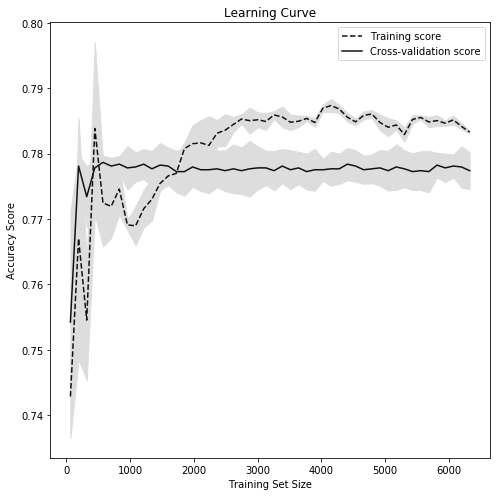

In [531]:
#Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [528]:
print("accuracy score" + " %s" % accuracy_score(y_cv,clf_pred1 ))

accuracy score 0.778066378066378


# Logistic Regression

In [525]:
model=LogisticRegression()
model.fit(x_train,y_train)
lr_pred=model.predict(x_cv)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


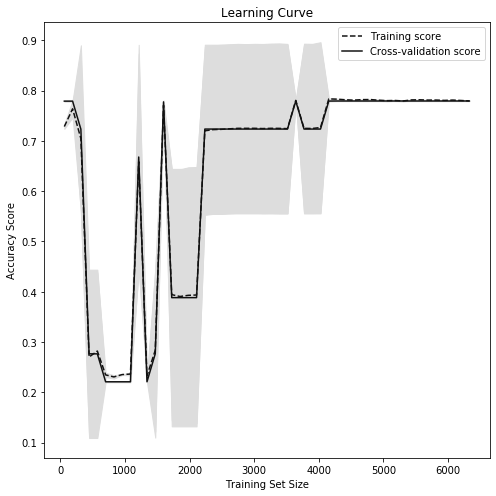

In [532]:
#Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [526]:
print("accuracy score" + " %s" % accuracy_score(y_cv, lr_pred))

accuracy score 0.7815295815295815


# KNN Classifier

In [508]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=5)

In [523]:
KNN_model.fit(x_train,y_train)
KNN_pred=KNN_model.predict(x_cv)

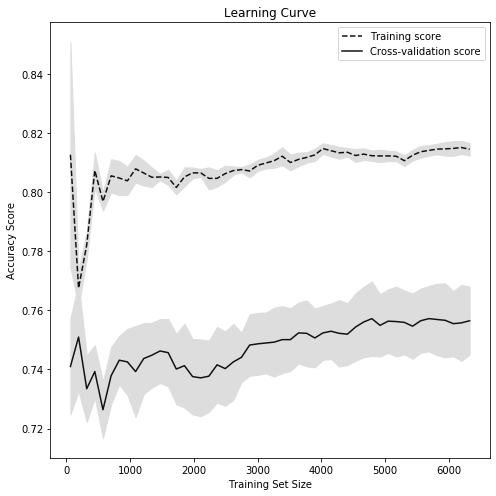

In [533]:
#Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(KNN_model,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [524]:
print("accuracy score" + " %s" % accuracy_score(y_cv,KNN_pred))

accuracy score 0.7572871572871573


# DecisionTreeClassifier

In [519]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
clf_pred2=clf.predict(x_cv)

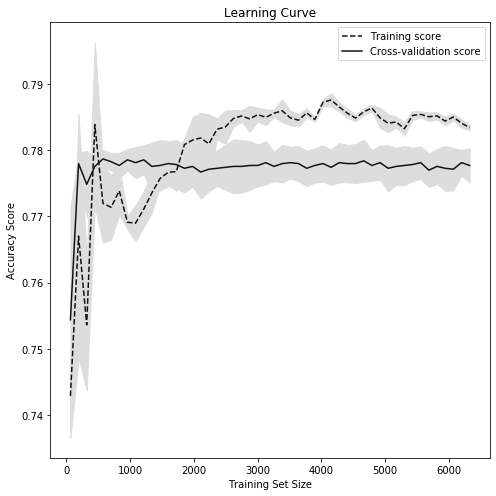

In [534]:
#Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [520]:
print("accuracy score" + " %s" % accuracy_score(y_cv,clf_pred2))

accuracy score 0.7795093795093795


# LinearDiscriminant Analysis

In [521]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_pred=lda.predict(x_cv)

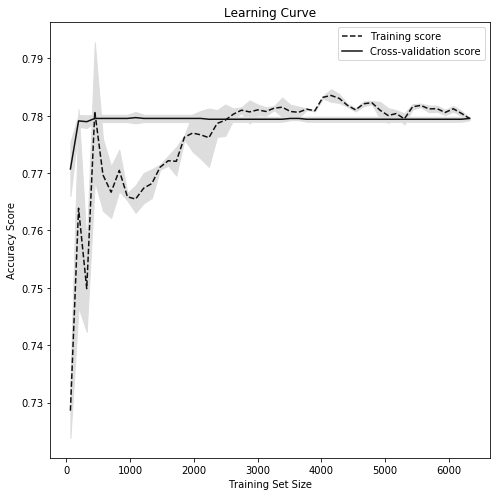

In [535]:
#Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lda,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [522]:
print("accuracy score" + " %s" % accuracy_score(y_cv, lda_pred))

accuracy score 0.7815295815295815


# Gaussian Naive Bayes

In [517]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred=gnb.predict(x_cv)
print("accuracy score" + " %s" % accuracy_score(y_cv, gnb_pred))

accuracy score 0.7786435786435787


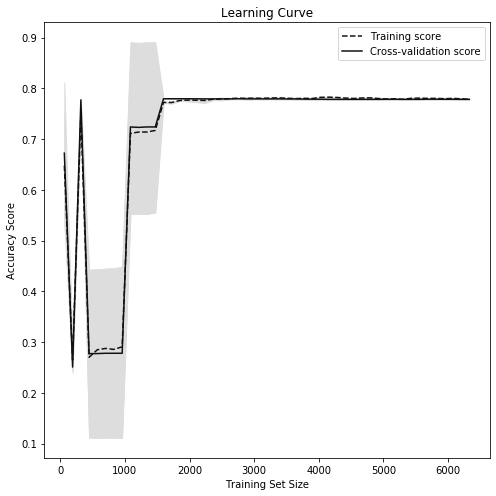

In [594]:
#Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(gnb,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

# Support Vector Machine

In [518]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_pred=svm.predict(x_cv)
print("accuracy score" + " %s" % accuracy_score(y_cv, svm_pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy score 0.7821067821067821


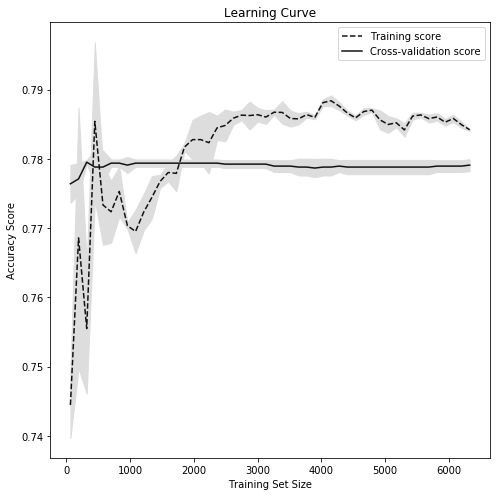

In [530]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svm,
                                               x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                               train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

# Logistic Regression and Gaussian Naive Bayesian classification are best fit model

# Prediction on Test Data

In [536]:
X=pd.DataFrame()

In [537]:
X=train1.copy()

In [538]:
X.drop(['gender','session_id','startTime','endTime','ProductList'],axis=1,inplace=True)

# Creating Dummy Variables to sync Test and Train Data

In [539]:
train_objs_num = len(X)
dataset=pd.DataFrame()
dataset = pd.concat(objs=[X, test], axis=0).sort_index()
len(dataset)

dataset_preprocessed = pd.get_dummies(dataset)
len(dataset_preprocessed)
train_preprocessed = dataset_preprocessed.iloc[:train_objs_num]
test_preprocessed = dataset_preprocessed.iloc[train_objs_num:]

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [540]:
print(train_preprocessed.columns)
print(test_preprocessed.columns)

Index(['NumProduct', 'UniqueA', 'UniqueB', 'hour_24h', 'total_time_spent',
       'weekday', 'FirstA_A00001', 'FirstA_A00002', 'FirstA_A00003',
       'FirstA_A00004',
       ...
       'MostA_A00002', 'MostA_A00003', 'MostA_A00004', 'MostA_A00005',
       'MostA_A00006', 'MostA_A00007', 'MostA_A00008', 'MostA_A00009',
       'MostA_A00010', 'MostA_A00011'],
      dtype='object', length=112)
Index(['NumProduct', 'UniqueA', 'UniqueB', 'hour_24h', 'total_time_spent',
       'weekday', 'FirstA_A00001', 'FirstA_A00002', 'FirstA_A00003',
       'FirstA_A00004',
       ...
       'MostA_A00002', 'MostA_A00003', 'MostA_A00004', 'MostA_A00005',
       'MostA_A00006', 'MostA_A00007', 'MostA_A00008', 'MostA_A00009',
       'MostA_A00010', 'MostA_A00011'],
      dtype='object', length=112)


In [541]:
X_scaled=pd.DataFrame(std.fit_transform(train_preprocessed),columns=train_preprocessed.columns,index=train_preprocessed.index)

In [456]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [542]:
test_scaled=pd.DataFrame(std.transform(test_preprocessed),columns=test_preprocessed.columns)
test_scaled.head()

,NumProduct,UniqueA,UniqueB,hour_24h,total_time_spent,weekday,FirstA_A00001,FirstA_A00002,FirstA_A00003,FirstA_A00004,...,MostA_A00002,MostA_A00003,MostA_A00004,MostA_A00005,MostA_A00006,MostA_A00007,MostA_A00008,MostA_A00009,MostA_A00010,MostA_A00011
0,-0.527056,-0.196346,-0.337515,0.944075,-0.014977,-0.543641,-0.415524,0.750000,-0.431788,-0.1124,...,0.747986,-0.430701,-0.114125,-0.130189,-0.102894,-0.047864,-0.045822,-0.051709,-0.065606,-0.068473
1,0.749550,-0.196346,1.871901,0.160084,-0.014852,-1.548612,2.406599,-1.333333,-0.431788,-0.1124,...,-1.336923,-0.430701,-0.114125,-0.130189,-0.102894,-0.047864,-0.045822,-0.051709,-0.065606,-0.068473
2,-0.527056,-0.196346,-0.337515,1.336071,-0.014977,0.461329,-0.415524,-1.333333,2.315953,-0.1124,...,-1.336923,2.321799,-0.114125,-0.130189,-0.102894,-0.047864,-0.045822,-0.051709,-0.065606,-0.068473
3,-0.101521,-0.196346,-0.337515,0.160084,-0.014852,-0.543641,2.406599,-1.333333,-0.431788,-0.1124,...,-1.336923,-0.430701,-0.114125,-0.130189,-0.102894,-0.047864,-0.045822,-0.051709,-0.065606,-0.068473
4,-0.101521,-0.196346,-0.337515,-1.015904,-0.014852,-0.041156,-0.415524,0.750000,-0.431788,-0.1124,...,0.747986,-0.430701,-0.114125,-0.130189,-0.102894,-0.047864,-0.045822,-0.051709,-0.065606,-0.068473


# Logistic Regression

In [543]:
model=LogisticRegression()
model.fit(X_scaled,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [544]:
predtest=model.predict(test_scaled)

In [586]:
pred_final=predtest

In [588]:
pred_final

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [589]:

pred_final= np.where((pred_final == 0),'female','male')

In [590]:
pred_final

array(['female', 'female', 'female', ..., 'female', 'female', 'female'],
      dtype='<U6')

In [591]:
submission=pd.DataFrame(index=session_id)
submission["gender"]=pred_final

In [592]:
submission.gender.head()

session_id
u12112    female
u19725    female
u11795    female
u22639    female
u18034    female
Name: gender, dtype: object

In [593]:
pd.DataFrame(submission, columns=['gender']).to_csv('Results.csv')

# Gaussian Naive Bayesian Classifier

In [595]:
gnb = GaussianNB()
gnb.fit(X_scaled,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [596]:
predtest=model.predict(test_scaled)

In [597]:
pred_final=predtest

In [598]:
pred_final= np.where((pred_final == 0),'female','male')

In [599]:
submission=pd.DataFrame(index=session_id)
submission["gender"]=pred_final

In [600]:
submission.gender.head()

session_id
u12112    female
u19725    female
u11795    female
u22639    female
u18034    female
Name: gender, dtype: object

In [601]:
pd.DataFrame(submission, columns=['gender']).to_csv('Results_NB.csv')